# Class: [Data Science](https://git.generalassemb.ly/meccaLeccaHi/dat-sf-60)

**Student:** [Allen Au](https://www.linkedin.com/in/auallen/)    
    
**Date:** Dec. 3, 2019

## Final Project: NYC Real Estate Analysis

---

# Proposal

## The Problem

Visibility into Real Estate market has historically been opaque and segregated through local Multiple Listing Service (MLS) systems.  The understanding of a local market required a personal relationship with a Real Estate Broker with access to a local MLS sytesm.  Real Estate investment continues to be challenged with the following:

Cost
1. Requires a signifant capitol outlay 
2. Less liquid investment compared to stocks
3. Transaction cost is significant (closing cost, escrow, real estate agents, attourney fees, etc.)

**Predictablity**
3. Real Estate valuation can be emotional and subjective
4. Minimal insight into local market trends
 

## Proposal

With the advent of publicaly assesible data through government (City, State, US Gov.) agencies and private companies(i.e., Zillow), historical trends, insights, and predication can be asserted.

### Potential Datasets

**NYC Real Estate**
* New York City AirBnb: Historical analysis, Trends, Predictions (hosts, location, price)
 * Data Set: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
 
 
* New York Property Sales: Historical analysis, Trends, Predictions (buildings, apartments, location, price) 
 * Data Set: https://www.kaggle.com/new-york-city/nyc-property-sales
 
 
* Zillow Rent Index, 2010-Present
 * Data Set: https://www.kaggle.com/zillow/rent-index

### Hypothesis

**Goals and success metrics:**
1. Determine relative pricing relationship between different property types
2. Idenitfy sales volume between different property types
3. Identify neigborhood trends and their relationships with each other
4. Establsh a prediction for a particular neighborhood 


**Risks or limitations:**
What shortcoming exist for this data that make it less than ideal for answering this particular question?
1. Datasets above may not be complete
2. Datasets above may be biased during collection
3. Datasets above may not support specific questios in goals



### Strategies
 * https://www.kaggle.com/anilak1978/new-york-city-real-estate-property-analysis
 
 * https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
 
 * https://medium.com/geoai/house-hunting-the-data-scientist-way-b32d93f5a42f

# EDA

In [271]:
# Import libraries to read, anaylize and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

In [272]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# this selects the 'style' that matplotlib will use to generate plots
plt.style.use('fivethirtyeight')

In [273]:
# Read imdb csv data into movies dataframe
# https://www.kaggle.com/new-york-city/nyc-property-sales
nyc = pd.read_csv('./nyc-rolling-sales-cleaner.csv')

In [274]:
# Display head data for each borough
for borough in boroughs:
    print("Borough: {0}".format(borough))
    print(nyc[nyc['BOROUGH'] == borough].head(5))

Borough: 1.0
  Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0          4      1.0  ALPHABET CITY   
1          5      1.0  ALPHABET CITY   
2          6      1.0  ALPHABET CITY   
3          7      1.0  ALPHABET CITY   
4          8      1.0  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A  392.0   
1  07 RENTALS - WALKUP APARTMENTS                                 2  399.0   
2  07 RENTALS - WALKUP APARTMENTS                                 2  399.0   
3  07 RENTALS - WALKUP APARTMENTS                                2B  402.0   
4  07 RENTALS - WALKUP APARTMENTS                                2A  404.0   

    LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0   6.0                                  C2            153 AVENUE B  ...   
1  26.0                                  C7   234 EAST 4TH   STREET  ...   
2  39.0                                  C7   197

In [275]:
nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALEPRICE', 'SALE DATE'],
      dtype='object')

In [276]:
nyc.shape

(84548, 22)

In [277]:
nyc.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,6.783000e+04,6.783000e+04,67830.000000,67830.000000,6.783000e+04
mean,3.159457,4515.328395,433.839673,10749.371148,2.524163,0.241235,2.803243,3.386944e+03,3.395826e+03,1756.099735,1.573168,1.149625e+06
std,1.223877,3676.456304,692.941060,1407.190218,18.634539,9.727287,21.145354,3.894570e+04,3.213052e+04,586.526538,0.894783,1.157724e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3.000000,1411.000000,26.000000,10312.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,1.000000,0.000000e+00
50%,3.000000,3776.000000,58.000000,11212.000000,1.000000,0.000000,1.000000,2.001000e+03,1.431000e+03,1931.000000,1.000000,4.270000e+05
75%,4.000000,6624.000000,1018.000000,11357.000000,2.000000,0.000000,2.000000,3.040000e+03,2.346000e+03,1979.000000,2.000000,8.511335e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [278]:
# List of indexes representing NYC Boroughs
boroughs = [1.0,2.0,3.0,4.0,5.0]

# Determine Mean Sale Price by Borough
mean_saleprice = 0
for borough in boroughs:
    print("Borough: {}".format(borough))
    mean_saleprice = nyc[nyc['BOROUGH'] == borough].SALEPRICE.mean()
    print(mean_saleprice)

Borough: 1.0
3716478.3269212726
Borough: 2.0
652379.4386375021
Borough: 3.0
884477.2361065593
Borough: 4.0
572563.1098880684
Borough: 5.0
391372.4700988667


In [279]:
# Mean sale price by Borough using "groupby"
nyc.groupby(['BOROUGH']).mean()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
BOROUGH,,,,,,,,,,,
1.0,1041.057146,1147.108004,9830.494229,3.963498,0.514779,4.551187,984.966595,5996.512715,1566.821620,2.223609,3.716478e+06
2.0,4117.056103,308.211221,10343.668893,4.044916,0.189347,4.241610,4645.691768,5325.120220,1709.317248,1.441643,6.523794e+05
3.0,4267.912917,372.636032,11054.993773,2.291680,0.166581,2.499977,2438.763519,2893.703591,1745.409617,1.618896,8.844772e+05
4.0,7069.409967,264.828015,11288.654080,2.112675,0.256235,2.407598,3555.587386,2641.975849,1830.455715,1.395755,5.725631e+05
5.0,3273.850012,204.436098,10035.979262,1.243550,0.080540,1.326742,7568.321558,1911.125512,1867.588618,1.175187,3.913725e+05


In [280]:
# Focus on Sale Price
nyc.groupby("BOROUGH").SALEPRICE.mean()

BOROUGH
1.0    3.716478e+06
2.0    6.523794e+05
3.0    8.844772e+05
4.0    5.725631e+05
5.0    3.913725e+05
Name: SALEPRICE, dtype: float64

In [281]:
#nyc.info

In [282]:
# Find NaN / Nulls
nyc.isnull().sum()

Unnamed: 0                            0
BOROUGH                           16718
NEIGHBORHOOD                      16718
BUILDING CLASS CATEGORY           16718
TAX CLASS AT PRESENT              16718
BLOCK                             16718
LOT                               16718
EASE-MENT                         16718
BUILDING CLASS AT PRESENT         16718
ADDRESS                           16718
APARTMENT NUMBER                  16718
ZIP CODE                          16718
RESIDENTIAL UNITS                 16718
COMMERCIAL UNITS                  16718
TOTAL UNITS                       16718
LAND SQUARE FEET                  16718
GROSS SQUARE FEET                 16718
YEAR BUILT                        16718
TAX CLASS AT TIME OF SALE         16718
BUILDING CLASS AT TIME OF SALE    16718
SALEPRICE                         16718
SALE DATE                         16718
dtype: int64

* Lots of NaNs / Nulls found !!!!

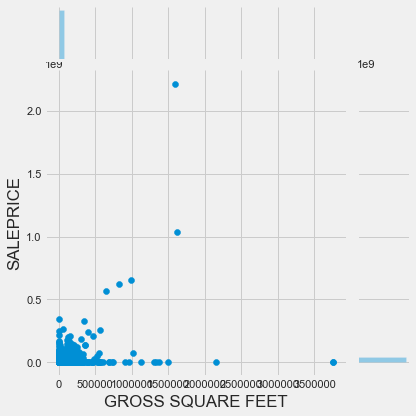

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


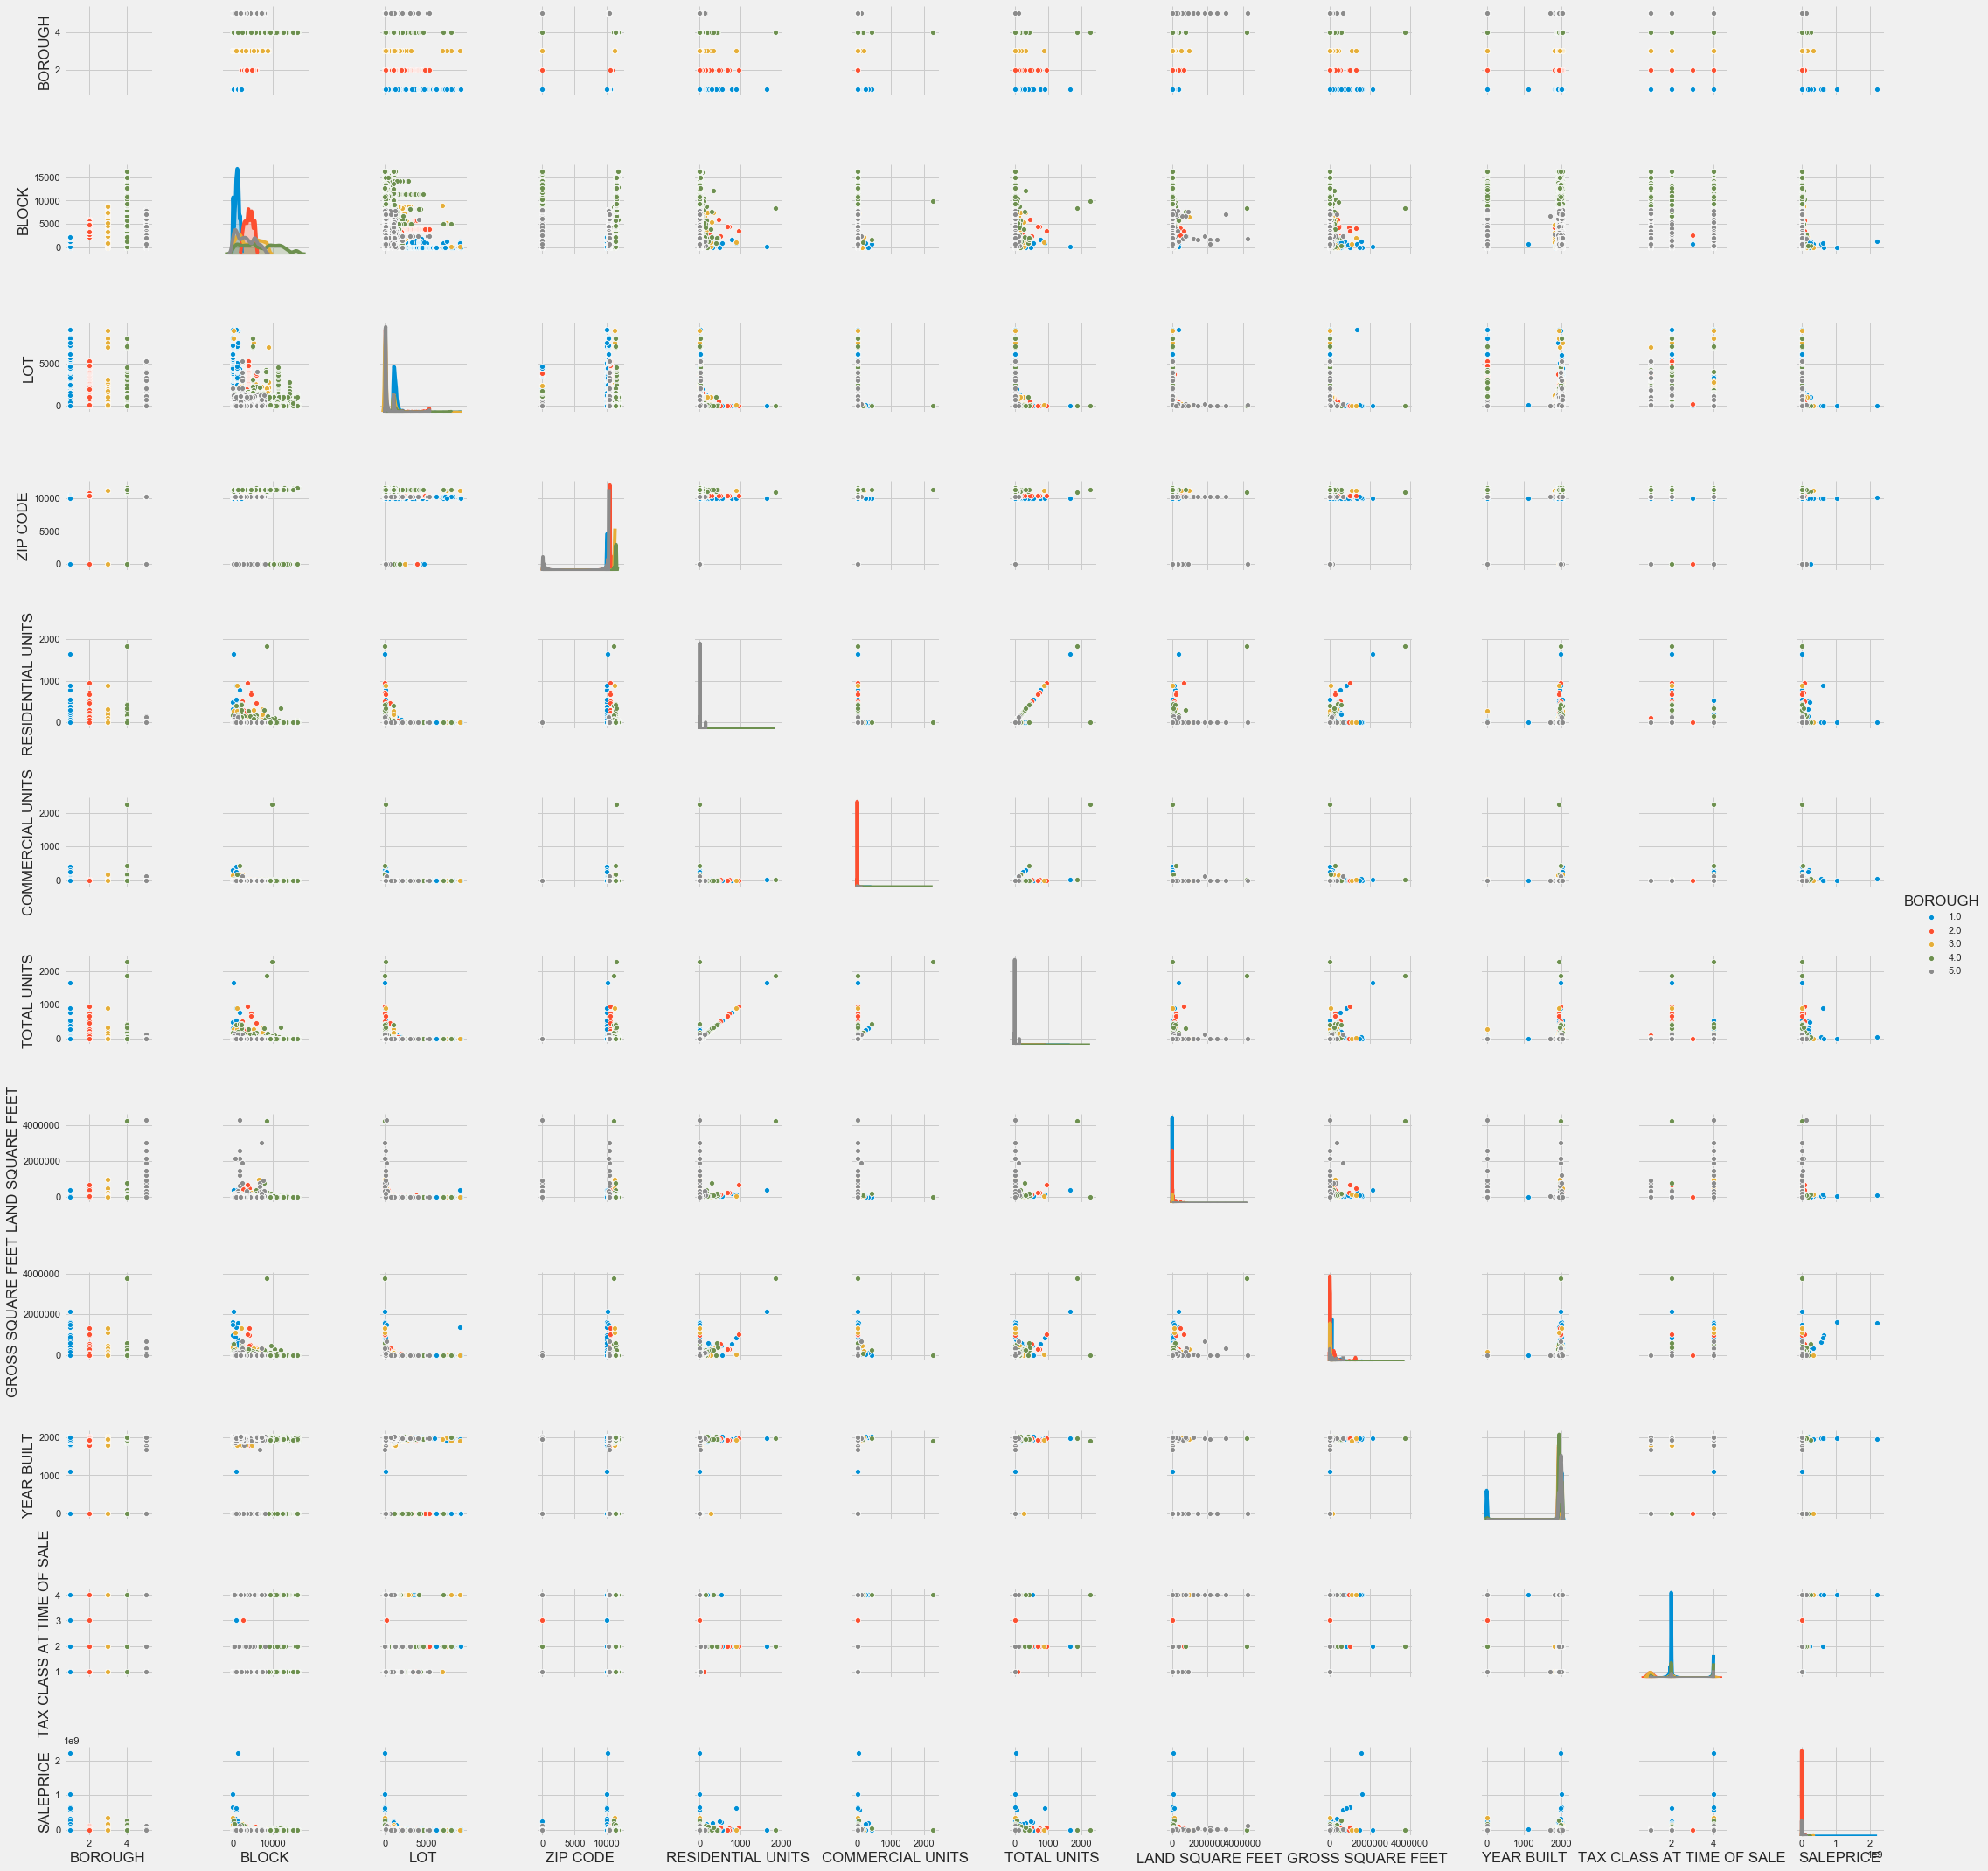

In [283]:
# Perform pairplot with dropna
sns.pairplot(nyc, hue="BOROUGH", dropna=True)

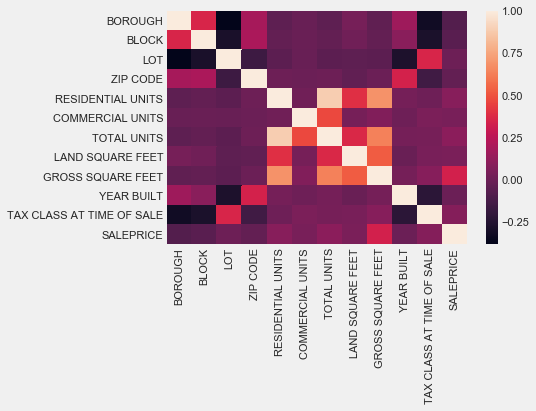

In [286]:
sns.heatmap(nyc.corr())

Based on address sample, we can guess the Borough Index mapping
* BOROUGH = 1.0: Manhattan
* BOROUGH = 2.0: Bronx
* BOROUGH = 3.0: Brooklyn
* BOROUGH = 4.0: Queens
* BOROUGH = 5.0: Staten Island

In [266]:
# # Histogram for duration
# # Using rule of thumb for number of bins: sqrt(979) = 33 bins
# ax = nyc['SALEPRICE'].hist(bins=50, figsize=(12,6))

# ax.set_title('Histogram of NYC Salesprice')
# ax.set_xlabel("NYC Salesprice Bins");
# ax.set_ylabel("Count");

In [267]:
nyc['SALEPRICE'].sort_values(ascending=False).head()

7447    2.210000e+09
2559    1.040000e+09
2557    6.520000e+08
6332    6.200000e+08
2050    5.650000e+08
Name: SALEPRICE, dtype: float64

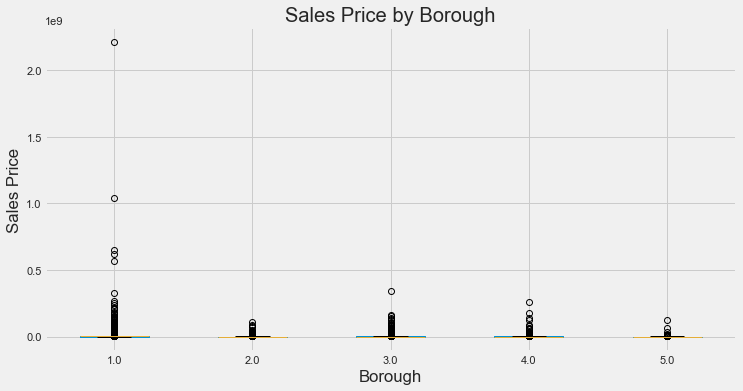

In [268]:
# Content Ratings by Duration
ax = nyc.boxplot(column='SALEPRICE', by='BOROUGH', figsize=(12,6));
plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Price by Borough');
ax.set_xlabel('Borough');
ax.set_ylabel('Sales Price');

In [257]:
# Display top 3 Zip Code by number of sales for each borough
for borough in boroughs:
    print("Borough: {0}".format(borough))
    print(nyc[nyc['BOROUGH'] == borough]['ZIP CODE'].value_counts().head(3))

Borough: 1.0
10019.0    780
10013.0    614
10016.0    584
Name: ZIP CODE, dtype: int64
Borough: 2.0
10469.0    659
10462.0    637
10466.0    539
Name: ZIP CODE, dtype: int64
Borough: 3.0
11234.0    1104
11201.0     998
11235.0     977
Name: ZIP CODE, dtype: int64
Borough: 4.0
11354.0    1181
11385.0     813
11355.0     714
Name: ZIP CODE, dtype: int64
Borough: 5.0
10314.0    1684
10312.0    1086
10306.0    1049
Name: ZIP CODE, dtype: int64


* Number of Sales by Borough

In [258]:
# Number of Sales by Boroughs
nyc['BOROUGH'].value_counts(sort=True, ascending=False)

4.0    21531
3.0    21359
1.0    10657
5.0     8294
2.0     5989
Name: BOROUGH, dtype: int64

1. Queens (108.1 mi²)
 * Wow!  Queens beats out Manhattan
2. Brooklyn (69.5 mi²)
3. Manhattan (22.82 mi²)
4. Staten Island (58.69 mi²)
5. Bronx (42.47 mi²)

* Number of Sales by Zip Code

In [259]:
nyc['ZIP CODE'].value_counts(sort=True, ascending=False).head(5)

10314.0    1684
11354.0    1181
11234.0    1104
10312.0    1086
10306.0    1049
Name: ZIP CODE, dtype: int64

## Focus EDA on Mahattan

In [260]:
nyc_manhattan = nyc[nyc.BOROUGH == 1.0]
nyc_manhattan.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
0,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,C2,6625000.0,2017-07-19 00:00:00
1,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,...,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14 00:00:00
2,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,...,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09 00:00:00
3,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,C4,3936272.0,2016-09-23 00:00:00
4,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,C2,8000000.0,2016-11-17 00:00:00


In [261]:
nyc_manhattan.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,10657.0,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,1.065700e+04,10657.000000,10657.000000,1.065700e+04
mean,1.0,1041.057146,1147.108004,9830.494229,3.963498,0.514779,4.551187,984.966595,5.996513e+03,1566.821620,2.223609,3.716478e+06
std,0.0,568.612419,858.141403,1401.212923,29.034060,8.558862,30.406549,7075.534795,4.931729e+04,788.876658,0.704989,2.801680e+07
min,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1.0,626.000000,1020.000000,10012.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1900.000000,2.000000,0.000000e+00
50%,1.0,1063.000000,1143.000000,10019.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1940.000000,2.000000,1.050000e+06
75%,1.0,1437.000000,1320.000000,10028.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,2002.000000,2.000000,2.750000e+06
max,1.0,2250.000000,9106.000000,10463.000000,1641.000000,422.000000,1653.000000,364000.000000,2.155492e+06,2017.000000,4.000000,2.210000e+09


In [262]:
nyc_manhattan.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALEPRICE                         0
SALE DATE                         0
dtype: int64

Wow!!  No NaNs/missing data for Manhattan!!!!

In [ ]:
# # Using rule of thumb for number of bins: sqrt(979) = 33 bins
# ax = nyc_manhattan['SALEPRICE'].hist(bins=50, figsize=(12,6))
# ax.set_title('Histogram of NYC Manhattan Salesprice')
# ax.set_xlabel("NYC Sales Price Bins");
# ax.set_ylabel("Count");

### Data Filtering and Clearning

- [x] Filter out non-Manhattan data
- [ ] Get rid of NaNs - (Mahattan has no NaNs)
- [x] Get rid of SALEPRICE = 0 (covered by filtering out < \$100k)
- [x] Get rid of SALEPRICE < $100K
- [x] Get rid of high outliers? - NO
- [ ] FillNA with mean by Borough
 * https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
 * https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531

In [ ]:
# Filter out proprerty less than $100,000
#nyc_manhattan = nyc_manhattan[nyc_manhattan['SALEPRICE'] != 0]
nyc_manhattan = nyc_manhattan[nyc_manhattan['SALEPRICE'] > 100000]
nyc_manhattan.shape

In [ ]:
# What is the effect of filter out data
nyc_manhattan['SALEPRICE'].describe()

In [ ]:
nyc_manhattan['SALEPRICE'].sort_values(ascending=False).tail(10)

In [ ]:
ax = nyc_manhattan.boxplot(column='SALEPRICE', figsize=(12,6));
plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Price Distribution in Manhattan');
ax.set_xlabel('Manhattan');
ax.set_ylabel('Sales Price');

In [ ]:
# Content Ratings by Duration
#ax = nyc_manhattan.boxplot(column='SALEPRICE', by='ZIP CODE', figsize=(12,6));
ax = nyc.boxplot(column='SALEPRICE', by='BOROUGH', figsize=(12,6));

plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Price by Zip Code');
ax.set_xlabel('Zip Code');
ax.set_ylabel('Sales Price');

In [ ]:
nyc_manhattan.sort_values(by='SALEPRICE', ascending=False).head(3)

In [ ]:
# Top 10 Zip Codes with highest average sale price
nyc_manhattan.groupby("ZIP CODE").SALEPRICE.mean().sort_values(ascending=False).head(5)

**Top 5 Manhattan Zip Codes and Neighborhoods** 
1. 10167: Midtown
2. 10001: Chelsea
3. 10004: Battery Park
4. 10005: Wall Street
5. 10018: Midtown West

In [ ]:
#nyc_manhattan.groupby('ZIP CODE')['SALEPRICE'].value_counts()

In [ ]:
top_mahattan_zip_codes = ['10167','10001','10004', '10005', '10018']
nyc_manhattan_top_zip = nyc_manhattan[nyc_manhattan['ZIP CODE'].isin(top_mahattan_zip_codes)]

In [ ]:
nyc_manhattan_top_zip.shape
nyc_manhattan.shape

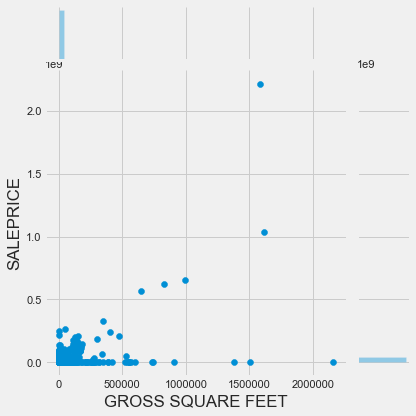

In [289]:
# https://www.kaggle.com/sonakshi19/boston-housing
# http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/
sns.jointplot(x='GROSS SQUARE FEET',y='SALEPRICE', data=nyc_manhattan, kind='scatter')